In [1]:
#importing the data reading library
import pandas as pd

#importing plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt

#plotting both in a 3d graph
from mpl_toolkits.mplot3d import Axes3D



In [2]:
#reading the data
df = pd.read_csv('creditcard.csv', low_memory=False)
#shuffling the data
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,54120.0,1.186834,0.074963,0.219473,1.325291,-0.120454,-0.013150,-0.050386,0.101670,0.565993,...,-0.143849,-0.258739,-0.087502,-0.310688,0.654846,-0.285069,0.028386,0.009024,9.46,0
1,38871.0,-0.763017,-0.678538,1.421298,-2.322817,-0.045755,-1.015751,-0.180228,-0.136763,-2.401684,...,-0.153353,-0.172072,-0.339915,-0.123539,0.776282,-0.115886,0.012140,0.054016,12.12,0
2,35116.0,1.449977,-1.078348,0.524094,-1.282925,-1.631097,-0.769102,-1.061577,-0.063172,-1.687565,...,-0.178553,-0.149799,0.118384,0.356542,0.229596,-0.193343,0.038601,0.018604,15.00,0
3,107451.0,1.051034,-2.024244,-1.033676,0.497356,-0.739601,0.583445,-0.261543,0.008276,2.549750,...,0.334763,0.267180,-0.324816,0.193800,-0.322372,0.014444,-0.114602,0.028285,500.00,0
4,50260.0,-0.865395,0.855973,2.777825,3.202315,-0.247572,1.063687,0.296347,0.469373,-1.104850,...,0.249395,0.539336,0.002816,0.025107,-0.108921,0.110576,0.091705,0.121567,88.63,0


> The Data contains the v1 to v8 (*User data*) , time, amount and class

In [3]:
print(df.describe()) #seeing into the data

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.190136e-15  2.907060e-16 -1.338056e-15  2.113850e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.042401e-15  1.523636e-15 -5.765553e-16  1.204898e-16 -2.395307e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [4]:
#visualizing the data
fraud = df.loc[df["Class"] == 1]
non_fraud = df.loc[df["Class"] == 0]
print("Fraud cases : ", len(fraud))
print("non-fraud cases : ", len(non_fraud))

Fraud cases :  492
non-fraud cases :  284315


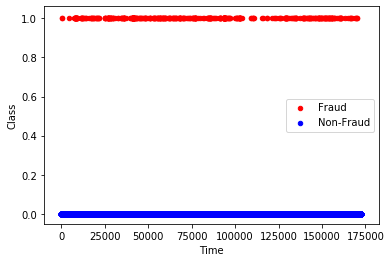

In [5]:
#visualizing time vs class
ax1 = fraud.plot.scatter(x='Time', y='Class', color='Red', label='Fraud')
non_fraud.plot.scatter(x='Time', y='Class', color='Blue', label='Non-Fraud', ax=ax1)
plt.show()

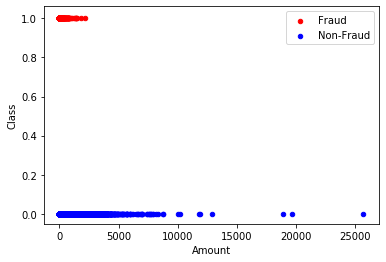

In [6]:
#visualizing Amount vs class
ax1 = fraud.plot.scatter(x='Amount', y='Class', color='Red', label='Fraud')
non_fraud.plot.scatter(x='Amount', y='Class', color='Blue', label='Non-Fraud', ax=ax1)
plt.show()

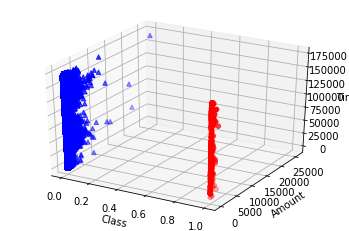

In [7]:
#analysing in 3d map
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(fraud['Class'], fraud['Amount'], fraud['Time'], c='r', marker='o')
ax.scatter3D(non_fraud['Class'], non_fraud['Amount'], non_fraud['Time'], c='b', marker='^')
ax.set_xlabel('Class')
ax.set_ylabel('Amount')
ax.set_zlabel('Time')
plt.show()

*As we can see the fraud transactions are more for the amount between 0 to 5000*

In [8]:
#Defining the x and y
X = df.iloc[:, :-1]
y = df['Class']
print(X[:10])
print(y[:10])

       Time        V1        V2        V3        V4        V5        V6  \
0   54120.0  1.186834  0.074963  0.219473  1.325291 -0.120454 -0.013150   
1   38871.0 -0.763017 -0.678538  1.421298 -2.322817 -0.045755 -1.015751   
2   35116.0  1.449977 -1.078348  0.524094 -1.282925 -1.631097 -0.769102   
3  107451.0  1.051034 -2.024244 -1.033676  0.497356 -0.739601  0.583445   
4   50260.0 -0.865395  0.855973  2.777825  3.202315 -0.247572  1.063687   
5   61066.0  1.345328  0.308053 -0.283993  0.367731  0.314232 -0.267873   
6  148486.0 -0.674986  1.416606 -0.485704 -0.488117  0.752827 -0.412378   
7  126958.0 -0.557818 -1.543678  1.258794  0.732138 -0.343593  0.759452   
8  122631.0  2.093332 -0.105524 -1.613240  0.332959  0.523631 -0.312791   
9   14615.0 -0.888077  1.824337  0.979101  2.846460  0.412735  0.485830   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0 -0.050386  0.101670  0.565993  ... -0.282443 -0.143849 -0.258739 -0.087502   
1 -0.180228 -0

In [9]:
#importing the machine learning libraries
from sklearn.preprocessing import scale #for scaling the data
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [10]:
#function for normalizing the values
def normalize(X):
    
    for feature in X.columns:
        X[feature] = scale(X[feature]) #scale = (feature - mean(feature))/std(feature)
    return X

In [11]:
#scaling x
X = normalize(X)
print(X[:10])

       Time        V1        V2        V3        V4        V5        V6  \
0 -0.856928  0.605932  0.045396  0.144747  0.936028 -0.087270 -0.009870   
1 -1.178040 -0.389554 -0.410910  0.937376 -1.640563 -0.033150 -0.762422   
2 -1.257113  0.740278 -0.653027  0.345651 -0.906106 -1.181745 -0.577288   
3  0.266112  0.536600 -1.225844 -0.681731  0.351273 -0.535848  0.437933   
4 -0.938212 -0.441823  0.518361  1.832033  2.261736 -0.179368  0.798403   
5 -0.710660  0.686850  0.186551 -0.187299  0.259721  0.227664 -0.201066   
6  1.130224 -0.344611  0.857870 -0.320332 -0.344748  0.545431 -0.309530   
7  0.676889 -0.284791 -0.934823  0.830201  0.517096 -0.248936  0.570044   
8  0.585771  1.068740 -0.063903 -1.063965  0.235163  0.379376 -0.234781   
9 -1.688821 -0.453403  1.104784  0.645737  2.010402  0.299030  0.364664   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0 -0.040730  0.085125  0.515181  ... -0.366369 -0.195840 -0.356537 -0.140125   
1 -0.145687 -0

In [12]:
#splitting into train and test testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [13]:
X_train[:10]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
88451,-0.992225,0.008781,-0.089949,-0.063012,-0.652234,0.841528,-0.420949,0.706543,-0.118333,-0.219395,...,-0.028430,0.046849,0.137029,1.258667,-0.480669,-5.090619,0.308015,0.250256,0.377392,-0.129417
166137,-0.335408,-0.642109,1.090489,0.273867,0.837174,-0.178456,0.203587,-0.015602,0.797110,-0.474986,...,0.112401,-0.015596,0.273566,-0.177083,-0.658292,0.190642,-0.382589,0.739089,0.399357,-0.279865
211911,-1.388451,0.740012,-0.725344,0.224732,-1.185351,-0.830109,0.250329,-1.055030,0.165174,-1.677427,...,-0.436746,-0.468553,-0.962547,0.145988,-1.461404,0.212103,-0.715972,0.118385,0.025763,-0.250119
184574,-0.886114,0.526184,-0.537600,0.954113,0.411327,-1.257842,0.022887,-0.927553,0.178318,-0.249781,...,-0.535541,-0.017716,0.397281,0.015993,0.599216,0.162827,-0.520482,0.242163,0.190032,0.046579
249736,0.915475,-0.401921,0.988303,-0.721562,-0.416392,0.145482,-0.579040,0.216351,0.590784,-0.430217,...,-0.073947,0.612324,1.886625,-0.151796,-0.731634,-1.226742,-0.419748,0.902789,0.740776,-0.349671
174916,-0.571972,-2.552804,-0.458493,-0.578539,-1.307575,-2.780355,0.050268,0.291362,1.375970,0.362083,...,-1.961493,0.164982,0.929364,-0.375037,0.879589,1.224116,-0.098594,-0.659202,-3.780261,1.186034
65152,-1.031098,0.534724,-0.438575,0.521412,0.344611,-0.773705,0.185973,-0.620633,0.183043,-0.872036,...,-0.526369,-0.160947,-0.090256,-0.064191,-0.044002,0.445185,-0.611160,0.151442,0.116308,0.038583
78467,1.444324,0.157986,-0.093746,0.334089,-1.383256,-0.145549,-0.152929,-0.013651,0.136765,-0.871178,...,-0.035306,-0.217081,-0.949722,0.506216,1.003057,-1.557203,-1.649256,0.040945,0.006663,-0.273468
142228,0.728986,0.700088,-1.150219,0.104136,0.016284,-0.674816,1.842339,-1.258422,0.705931,2.676445,...,0.145035,0.466222,1.739617,-0.154159,-2.585061,-0.574330,-0.973736,0.378025,-0.036099,0.501242
29540,0.996253,-0.413176,0.249027,-0.587635,-0.252355,0.899140,-0.840311,0.345677,0.271804,-0.250797,...,0.008491,-0.146540,-0.975624,0.384475,0.592681,-2.181178,-0.000368,0.162884,0.277851,-0.240044


In [14]:
#define the model
logistic = linear_model.LogisticRegression(C=1e5)

#fitting the model over training data
logistic.fit(X_train,y_train)

#predict
y_pred = logistic.predict(X_test)

#calculating score
score = logistic.score(X_test, y_test)

print("Score : ",score)

/Users/vinodpatil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score :  0.999197455935315


In [15]:
#printing report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99491
           1       0.91      0.65      0.76       192

    accuracy                           1.00     99683
   macro avg       0.95      0.83      0.88     99683
weighted avg       1.00      1.00      1.00     99683

